<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдала задание:) Ты проделала большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку pandas, откроем файл с данными, сохраним таблицу в переменной `data` и изучим его: методом `.info()` узнаем общую информацию о таблице, а методом `.head()` выведем 5 первых строк таблицы для лучшего понимания данных.

In [206]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv')
data.info() 
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


### Вывод

В таблице 23699 записей о квртирах, для каждой записано:


airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах(м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

Но данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Данные загружены и изучены, класс

### Шаг 2. Предобработка данных

Сначала приведем таблицу к нормальному виду, указав, какими символами разделять колонки в параметрах функции read_csv() (параметром sep)


In [207]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,nan,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,nan
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,nan,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,nan,0.0,nan,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,nan,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,nan,14.0,nan,9,NaN,...,nan,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,nan,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Обработка пропусков

Посмотрим, в каких столбцах есть пропуски сочетанием методов `.isnull().sum()`

In [208]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Сначала разберемся с пропусками в столбце с числом балконов `balcony`. Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Сделаем это методом `.fillna()` и проверим успешность замены сочетанием методов `.isnull().sum()`

In [209]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().sum()

0

Теперь посмотрим на столбец `days_exposition`, где указано, сколько дней было размещено объявление (от публикации до снятия). В нем 3181 пропуск, однаков столбце `first_day_exposition` с датой публикации нет ни одного пропуска. Возможно, пропуски в столбце `days_exposition` обусловлены тем, что объявления до сих пор активны. Проверим эту гипотезу: создадим Series data_series, в который запишем данные столбца `days_exposition` таблицы data, а вместо пропущенных значений запишем разницу между сегодняшней датой (datetime.datetime.now()) и датой публикации (столбец  `first_day_exposition`). Предварительно переведем значения столбца `first_day_exposition` в формат даты (время не играет решающей роли, так как везде указаны просто нули). После указанных действий сравним среднние по стобцу `days_exposition` таблицы data и полученному Series data_series

In [210]:
from datetime import datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
pd.set_option('display.float_format', lambda x: '%.1f' % x)
data_series = data['days_exposition'].fillna(datetime.now() - data['first_day_exposition'])
print(data['days_exposition'].mean())
print(data_series.mean())

180.88863436982163
6267128675755512.0


Разница колоссальна, а значит гипотеза не подтвердилась. Поэтому правильней оставить пустые  значения  столбца `days_exposition` пустыми

Оставшиеся пустые значения в столбцах в количественными данными - 
ceiling_height — высота потолков, 
floors_total — всего этажей в доме,
living_area — жилая площадь в квадратных метрах,  
kitchen_area — площадь кухни,
cityCenters_nearest — расстояние до центра города, 
airports_nearest — расстояние до ближайшего аэропорта,
parks_around3000 — число парков в радиусе 3 км,
parks_nearest — расстояние до ближайшего парка (м),
ponds_around3000 — число водоёмов в радиусе 3 км,
ponds_nearest — расстояние до ближайшего водоёма (м);
а тем более с качественными данными -  
locality_name — название населённого пункта,
is_apartment — апартаменты (булев тип),
нельзя заменить ни на средние по столбцам, ни нулями, ведь они являются индивидуальными для каждой квартиры и сильно влияют на результаты анализа. Пропуски в этих стобцах могли появиться из-за того, что продавцы забыли/не хотят указывать некоторые данные во избежание мошенничества, или из-за ошибок в алгоритмах автоматического подсчета значений, или из-за мошенничества.Более того, некоторые столбцы получены автоматически на основе картографических данных, а пропуски в этих стобцах заставляют закладывают сомнения в том, что это не мошенники. 

Просто избавиться от всех этих пропусков тоже не получится-так мы потеряем огромную часть данных
Поэтому правильней будет отбросить строки с пропусками в столбце `floors_total` (их доля всего 86/23699 = 0.004), а остальные  пустые значения в этих столбцах оставить пустыми и учесть это при дальнейшем анализе.

In [211]:
data = data.drop(data[data['floors_total'].isna()].index).reset_index(drop = True)

### Вывод

Удалось избавиться от пропусков в столбцах 'balcony' и 'floors_total' без особой потери данных, пропуски в оставшихся столбцах придется учитывать при дальнейшем анализе.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Всё верно

## Приведение данных к нужным типам

Сначала посмотрим, какие типы данных представлены в таблице методом `.dtypes`

In [212]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Данные в столбце `first_day_exposition` мы уже привели к формату дат. Количество этажей (столбец `floors_total`), число балконов (столбец `balcony`), число водоёмов в радиусе 3 км (столбец `ponds_around3000`), число парков в радиусе 3 км (столбец `parks_around3000`) могут быть только целыми, поэтому значения в указанных столбцах следует привести к типу `int64`. А столбец `is_apartment` — апартаменты, может принимать только два значения - Истина (является апартаментами) или Ложь (не является апартаментами), а значит этот столбец лучше привести к типу `bool`. Произведем указанные изменения с учетом того, что в стобцах остались пустые значения.

In [213]:
data.loc[data['floors_total'].notnull(), 'floors_total'] = data.loc[data['floors_total'].notnull(), 'floors_total'].apply(int)
data['floors_total'] = data['floors_total'].astype('Int64')

data.loc[data['balcony'].notnull(), 'balcony'] = data.loc[data['balcony'].notnull(), 'balcony'].apply(int)
data['balcony'] = data['balcony'].astype('Int64')

data.loc[data['ponds_around3000'].notnull(), 'ponds_around3000']\
= data.loc[data['ponds_around3000'].notnull(), 'ponds_around3000'].apply(int)
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')

data.loc[data['parks_around3000'].notnull(), 'parks_around3000']\
= data.loc[data['parks_around3000'].notnull(), 'parks_around3000'].apply(int)
data['parks_around3000'] = data['parks_around3000'].astype('Int64')

data.loc[data['is_apartment'].notnull(), 'is_apartment']\
= data.loc[data['is_apartment'].notnull(), 'is_apartment'].apply(bool)
data['is_apartment'] = data['is_apartment'].astype('bool')

посмотрим, какие типы данных представлены в таблице data теперь методом .dtypes и убедимся в успешности преобразований

In [214]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000                 Int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Вывод

Изменены типы данных в столбцах:
`first_day_exposition` - формат дат. 
Количество этажей (столбец `floors_total`), число балконов (столбец `balcony`), число водоёмов в радиусе 3 км (столбец `ponds_around3000`), число парков в радиусе 3 км (столбец `parks_around3000`) - к типу `int64`. 
`is_apartment` — апартаменты -  к типу `bool`.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


### Шаг 3. Посчитайте и добавьте в таблицу:

#### цену квадратного метра

Для этого создадим в таблице data новый столбец `price_per_meter`, в который для каждой квартиры запишем результат деления цены на общую площадь.

In [215]:
data['price_per_meter'] = data['last_price']/data['total_area']
data['price_per_meter'].head(5)

0   120370.4
1    82920.8
2    92785.7
3   408176.1
4   100000.0
Name: price_per_meter, dtype: float64

#### день недели, месяц и год публикации объявления

Для этого создадим в таблице data новые столбцы `weekday`, `month`, `year`, в которые методами `dt.weekday`, `dt.month`, `dt.year` для каждой квартиры запишем день недели, месяц и год публикации объявления, соответственно.

In [216]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data[['weekday', 'month', 'year']].head()

,weekday,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018


### этаж квартиры; варианты — первый, последний, другой;

Для этого напишем функцию `floor_category`, которая присваивает каждой квартире категорию этажа -первый/последний/другой. Эту функцию применим к таблице data, а результат сохраним в отдельном столбце `floor_category`

In [217]:
def floor_category(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(lambda x: floor_category(x['floor'], x['floors_total']), axis=1)
data['floor_category'].unique()                               

array(['другой', 'первый', 'последний'], dtype=object)

### соотношение жилой и общей площади, а также отношение площади кухни к общей.

Для этого создадим в таблице data новый столбец `living_to_total`, в который для каждой квартиры запишем результат деления жилой площади на общую площадь, и новый столбец `kitchen_to_total`, в который для каждой квартиры запишем результат деления  площади кухни на общую площадь

In [218]:
data['living_to_total'] = data['living_area']/data['total_area']
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']
data[['living_to_total', 'kitchen_to_total']].head()

,living_to_total,kitchen_to_total
0,0.5,0.2
1,0.5,0.3
2,0.6,0.1
3,nan,nan
4,0.3,0.4


### Вывод

В таблицу добавлены важные для анализа статистические столбцы-
цена квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.### Вывод

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.**

Сначала изучим общую площадь: построим гистограмму по столбцу data['total_area']. Также посмотрим диаграмму размаха методом boxplot() и список характерных значений столбца `total_area` методом `.describe`

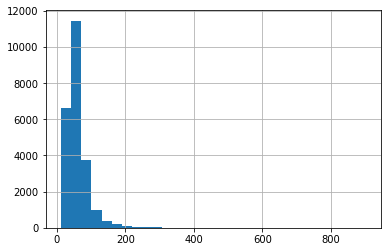

count   23613.0
mean       60.3
std        35.6
min        12.0
25%        40.0
50%        52.0
75%        69.8
max       900.0
Name: total_area, dtype: float64

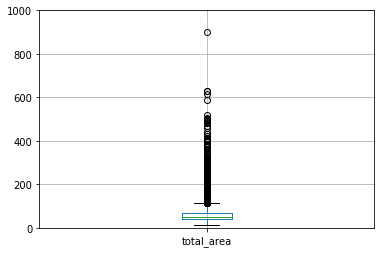

In [219]:
import matplotlib.pyplot as plt 
data['total_area'].hist(bins = 30)
plt.show()
plt.ylim(0, 1000)
data.boxplot('total_area')
data.describe()['total_area']

Полученная гистограмма похожа по форме на распределение Пауссона, однако пик и значения около 0 слишком высоки. Нижний ус заканчивается минимальным значением 12 и есть много значений, гораздо превосходящих остальные и выходящих за верхний ус (площадь более 100 кв м). Но первый квартиль находится на уровне 40 кв м, а 3 -на 69.8 кв м, что похоже на правду.

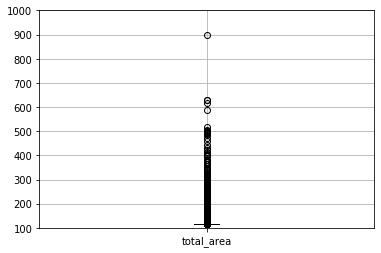

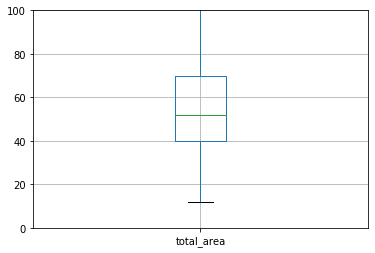

In [220]:
plt.ylim(100, 1000)
data.boxplot('total_area')
plt.show()
plt.ylim(0, 100)
data.boxplot('total_area')

Да и среднее значение 60.3 и значение медианы (около 50) довольно близки, а значит необычно больших и необычно маленьких значений не сильно много. Однако для более стандартизированной статистике лучше избавиться от таких редких значений. Посчитаем количество квартир с плошадью более 150 или менее 30 кв м

In [221]:
data[(data['total_area'] > 150) | (data['total_area'] < 30)]['total_area'].count()

1245

Их доля 1245/23613 = 0.05 невилика, поэтому избавление от таких значений не сильно скажется на охвате анализа, зато сделает статистику более стандартизированной. Избавимся от редких значений и изучим измененный столбец `total_area` в изменной таблице data

In [222]:
data = data[(data['total_area'] < 150) & (data['total_area'] > 30)]

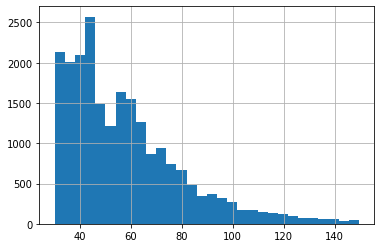

count   22144.0
mean       57.6
std        22.5
min        30.1
25%        41.0
50%        52.3
75%        68.5
max       149.6
Name: total_area, dtype: float64


52.28

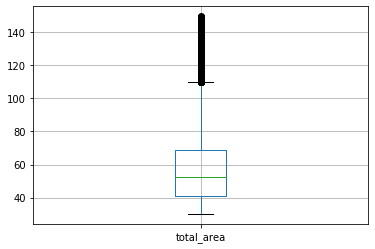

In [223]:
data['total_area'].hist(bins = 30)
plt.show()
data.boxplot('total_area')
print(data.describe()['total_area'])
data['total_area'].median()

Полученная гистограмма уже более близка к распределению Пауссона,медиана 52.28 и среднее занчение 57.6 почти совпадают а диаграмма размаха выглядит куда более реалистично. 

На всякий случай изучим в измененной таблице жилые площади и площади кухни

count   20369.0
mean       10.3
std         4.9
min         2.0
25%         7.1
50%         9.1
75%        11.8
max        93.0
Name: kitchen_area, dtype: float64

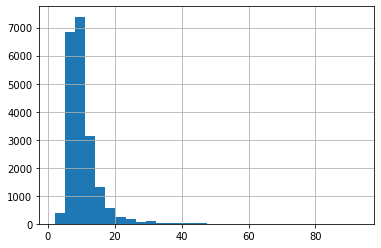

In [224]:
data['kitchen_area'].hist(bins = 30)
data.describe()['kitchen_area']

count   20430.0
mean       32.9
std        15.3
min         2.0
25%        19.0
50%        30.1
75%        42.0
max       128.0
Name: living_area, dtype: float64

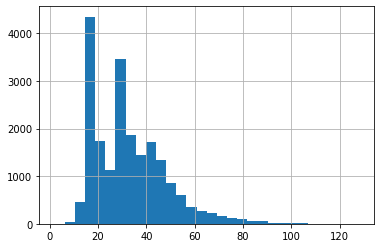

In [225]:
data['living_area'].hist(bins = 30)
data.describe()['living_area']

Эти столбцы с учетом разброса общей площади тоже вполне реалистичны.

Теперь изучим цены. Так как площади квартир имеют большой разброс, правильней будет рассматривать цены за квадратный метр, которые назодятся в столбце `price_per_meter`. Построим гистограмму по столбцу data['price_per_meter']. Также посмотрим диаграмму размаха методом boxplot() и список характерных значений методом .describe

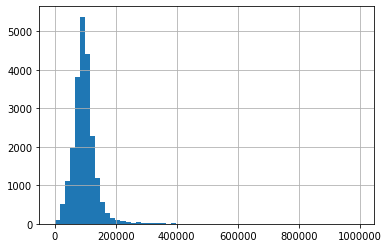

медиана: 94252.8735632184


count    22144.0
mean     97232.3
std      41374.4
min        111.8
25%      75900.9
50%      94252.9
75%     113034.8
max     995983.9
Name: price_per_meter, dtype: float64

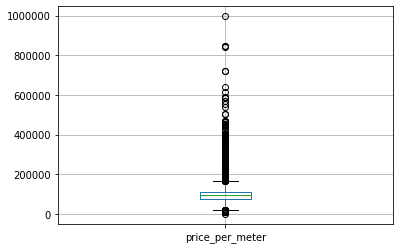

In [226]:
data['price_per_meter'].hist(bins = 60)
plt.show()
data.boxplot('price_per_meter')
print('медиана:', data['price_per_meter'].median())
data.describe()['price_per_meter']

Гистограмма по этому столбцу имеет форму нормального распределения, медиана 94252 и среднее занчение 97232 почти совпадают, но эти значения не похожи на правду, и гистограмма говорит о подозрительных данных: очень много значений выходят за верхний ус, а первый квртиль находится на подозрительно низком уровне - 75900. Есть невероятно низкие значения (111.8) и высокие(995983.9) цены за кв м. Попробуем избавиться от выбивающихся значений.

In [227]:
print(data[(data['price_per_meter'] > 250000) | (data['price_per_meter'] < 50000)]['price_per_meter'].count())
len(data)

1900


22144

Их доля 1900/22144 = 0.08 ощутима, но для более стандартизированного анализа лучше немного пожертвовать объемом исследуемых данных в пользу их качества. Избавимся от редких значений

In [228]:
data = data[(data['price_per_meter'] < 250000) & (data['price_per_meter'] > 50000)]

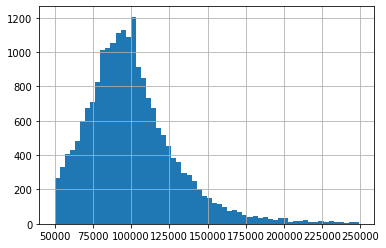

медиана: 96610.16949152542


count    20197.0
mean    100424.5
std      29228.3
min      50073.6
25%      80882.4
50%      96610.2
75%     114516.1
max     249056.6
Name: price_per_meter, dtype: float64

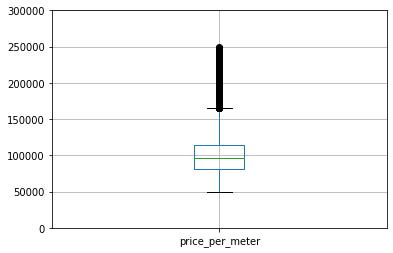

In [229]:
data['price_per_meter'].hist(bins = 60)
plt.show()
plt.ylim(0, 300000)
data.boxplot('price_per_meter')
print('медиана:', data['price_per_meter'].median())
data.describe()['price_per_meter']

Теперь и гистограмма более похожа на распределение Пауссона, и диаграмма размаха показывает куда более реалистичную информацию и меньшее количество выбросов

Займемся изучением столбца `rooms` , где хранится количество комнат

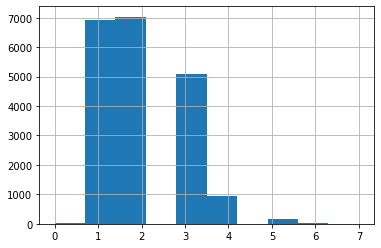

медиана: 2.0


count   20197.0
mean        2.0
std         0.9
min         0.0
25%         1.0
50%         2.0
75%         3.0
max         7.0
Name: rooms, dtype: float64

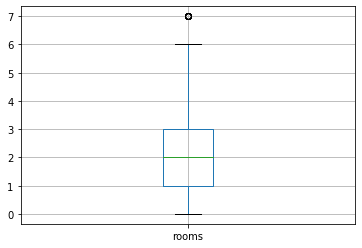

In [230]:
data['rooms'].hist()
plt.show()
data.boxplot('rooms')
print('медиана:', data['rooms'].median())
data.describe()['rooms']

Здесь замечены 2 отклонения: во-первых, квартиры с 0 комнат, что скорее всего, означает, что это либо студия, либо квартира со свободной планировкой. Проверим эту гипотезу

In [231]:
data[data['rooms'] == 0][['studio','open_plan']].sum(axis = 1)

505      1
835      1
1170     1
1524     1
3137     1
3447     1
4668     1
6781     1
6984     1
7213     1
9022     1
9975     1
12178    1
13558    1
13814    1
15257    1
15642    1
15652    1
15694    1
16067    1
16457    1
17735    1
17883    1
17957    1
18061    1
19660    1
20007    1
21149    1
21549    1
21972    1
dtype: int64

Гипотеза подтвердилась. Тогда это не ошибка в данных, а своеобразный способ заполнения. Логичней будет заменить эти значения на 1 комнату

In [232]:
data.loc[data['rooms'] == 0,'rooms'] = 1

Во-вторых, есть одна квартира с 7 комнатами. Это вполне реальная информация, но для усреднения данных лучше избавиться от этой записи

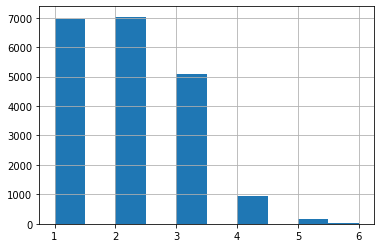

медиана: 2.0


count   20189.0
mean        2.0
std         0.9
min         1.0
25%         1.0
50%         2.0
75%         3.0
max         6.0
Name: rooms, dtype: float64

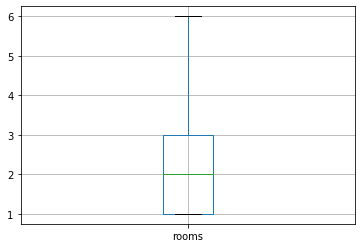

In [233]:
data= data[data['rooms'] != 7]
data['rooms'].hist()
plt.show()
data.boxplot('rooms')
print('медиана:', data['rooms'].median())
data.describe()['rooms']

Усы охватывают все данные,такой расклад нас устраиват.

Займемся изучением столбца `ceiling_height` , где хранится высота потолков

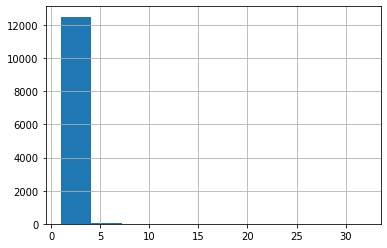

медиана: 2.65


count   12558.0
mean        2.8
std         0.9
min         1.0
25%         2.5
50%         2.6
75%         2.8
max        32.0
Name: ceiling_height, dtype: float64

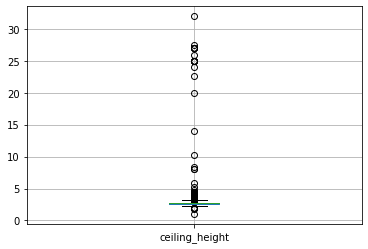

In [234]:
data['ceiling_height'].hist()
plt.show()
data.boxplot('ceiling_height')
print('медиана:', data['ceiling_height'].median())
data.describe()['ceiling_height']

Тут видны явные аномалии: потолки по 1 метру и 32 метра. От таких значений точно нужно избавляться, тем более, что доля выбивающихся записей совсем незначительна

In [235]:
print(len(data))
data[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2)]['ceiling_height'].count()

20189


52

In [236]:
data = data[(data['ceiling_height'] < 4) & (data['ceiling_height'] > 2)]

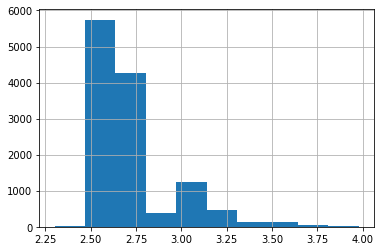

медиана: 2.65


count   12474.0
mean        2.7
std         0.2
min         2.3
25%         2.5
50%         2.6
75%         2.8
max         4.0
Name: ceiling_height, dtype: float64

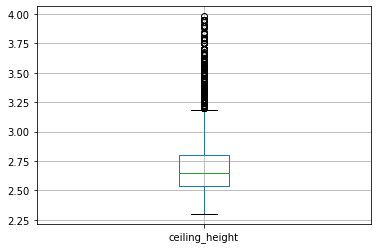

In [237]:
data['ceiling_height'].hist()
plt.show()
data.boxplot('ceiling_height')
print('медиана:', data['ceiling_height'].median())
data.describe()['ceiling_height']

Осталось достаточное число выбросов, выходящих за верхний ус, однако и гистограмма имеет нормальный вид, и медиана пракатически совпадает со средним значением. Поэтому для сохранения объема исследуемых данных оставим таблицу в таком виде.

### Вывод

От некоторых строк таблицы пришлось избавиться из-за сомнениц в корректности данных, от других - для более стандартизированного анализа, однако все изменения были сдеаланы с учетом того, чтобы оставить данные как можно более объемными.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Просто класс! Очень здорово и детально, работа проделана колоссальная, продолжай в том же духе


#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Построим гистограмму по столбцу `days_exposition`, который содержит время с момента размещения объявления и до его снятия (продажи квартиры), а также посчитаем среднее и медиану

среднее: 186.0546636085627
медиана: 100.0


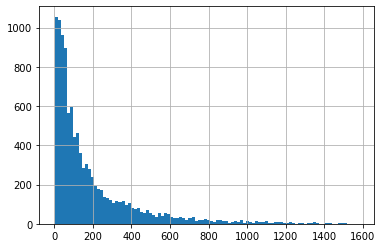

In [238]:
data['days_exposition'].hist(bins = 100)
print('среднее:',data['days_exposition'].mean())
print('медиана:',data['days_exposition'].median())

### Вывод

Среднее и медиана различаются практически в 2 раза, есть огромный пик в районе нуля, да и хвост у гистограммы слишком длиный (есть объявления, державшиеся более 3 лет). Скорее всего, некоторые объявления просто перестали мониторить, продали квартиру, а про объявление забыли, что и спровоцировало аномально большие значения или наоборот: выложили по ошибке, передумали продавать, или решили изменить объявление, удалив старое, в результате чего появилось необычно маленькое значения. Однако такие значения могли возникнуть в результате обычой продажи, то есть не по ошибке:быстро нашелся клиент, или наоборот, квартиру долго не могли продать. Более того,по гистограмме видно, что таких значений достаточно много, поэтому их удаление просто опустошит данные. Для дальнейшего анализа они не понадобятся, поэтому оставим столбец без изменений, а на данном этапе сделаем такие выводы: в среднем продажа квартиры занимает 100-180 дней, а значения, отклоняющиемя от этих значений, считаются быстрыми или медленными, соответственно стороне отклонения.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё правильно

Проверим все количественные столбцы исправленной таблицы на корректность данных, применив автоматическое построение гистограммы для каждого из них

total_images


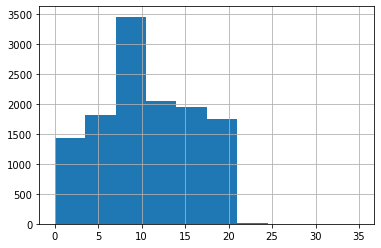

last_price


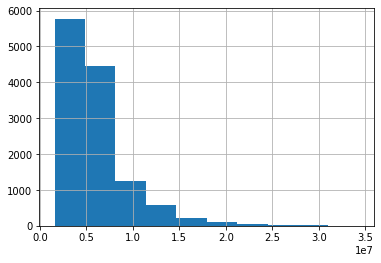

total_area


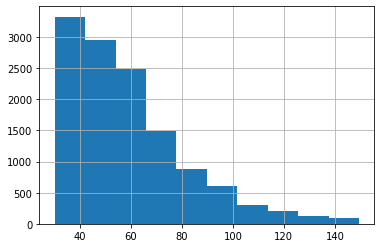

first_day_exposition


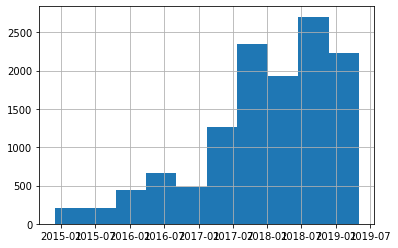

rooms


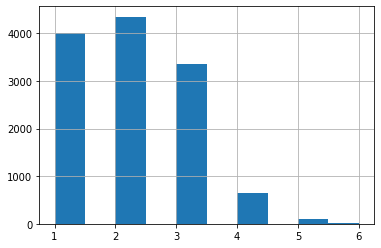

ceiling_height


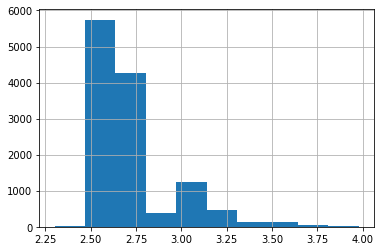

floors_total


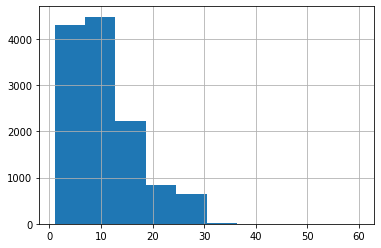

living_area


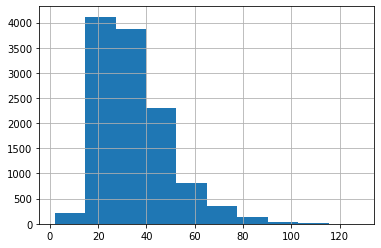

floor


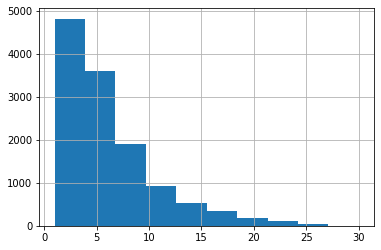

kitchen_area


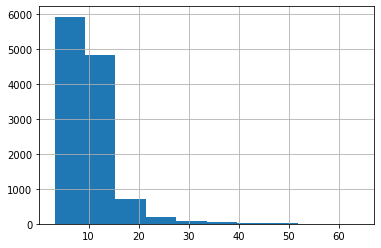

balcony


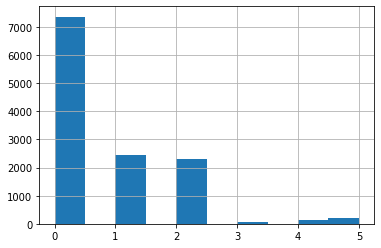

airports_nearest


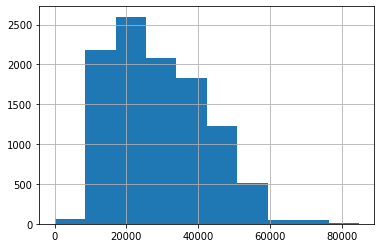

cityCenters_nearest


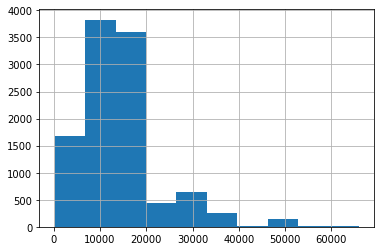

parks_around3000


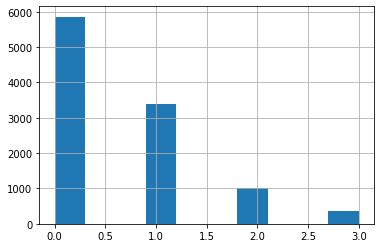

parks_nearest


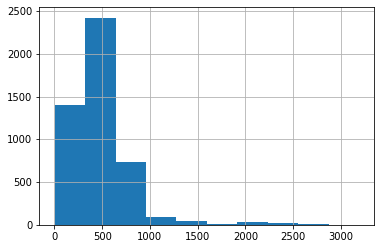

ponds_around3000


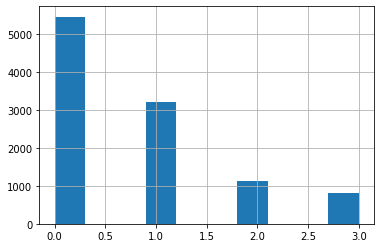

ponds_nearest


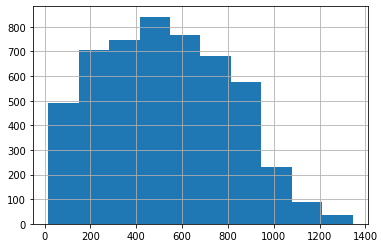

days_exposition


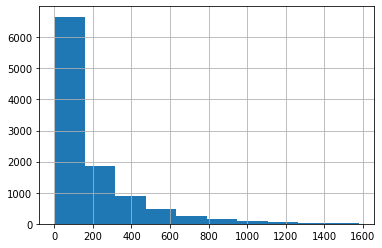

price_per_meter


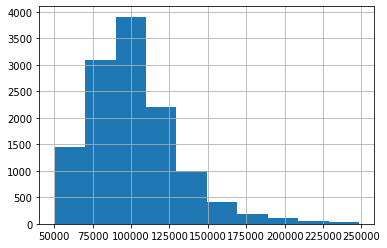

weekday


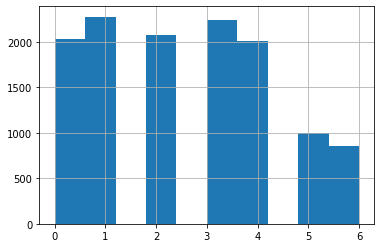

month


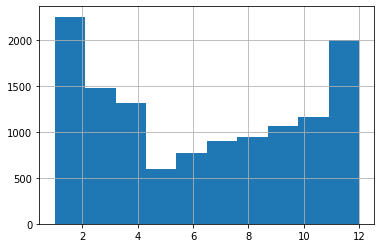

year


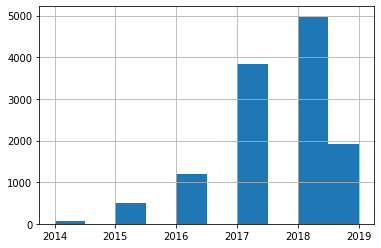

living_to_total


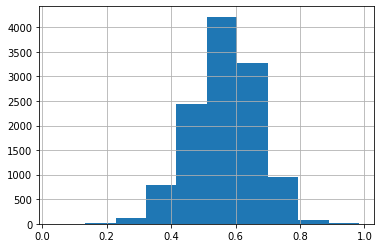

kitchen_to_total


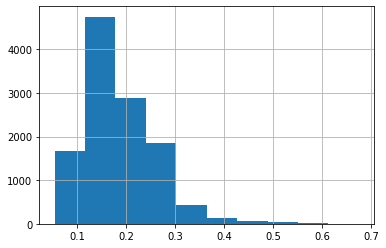

In [239]:
for column in data.columns:
    if ((data[column].dtype) != bool) and ((data[column].dtype) != object):
        print(column)
        data[column].hist()
        plt.show()

In [240]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_category,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,True,...,2,755.0,nan,120370.4,3,3,2019,другой,0.5,0.2
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,True,...,1,48.0,121.0,100000.0,1,6,2018,другой,0.3,0.4
9,18,5400000.0,61.0,2017-02-26,3,2.5,9,43.6,7,True,...,0,nan,289.0,88524.6,6,2,2017,другой,0.7,0.1
10,5,5050000.0,39.6,2017-11-16,1,2.7,12,20.3,3,True,...,2,553.0,137.0,127525.3,3,11,2017,другой,0.5,0.2
13,20,3550000.0,42.8,2017-07-01,2,2.6,5,27.0,5,True,...,3,298.0,366.0,82943.9,5,7,2017,последний,0.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23603,13,3550000.0,35.3,2018-02-28,1,2.9,15,16.3,4,True,...,2,652.0,29.0,100566.6,2,2,2018,другой,0.5,0.3
23605,11,9470000.0,72.9,2016-10-13,2,2.8,25,40.3,7,True,...,1,806.0,519.0,129904.0,3,10,2016,другой,0.6,0.1
23607,9,4600000.0,62.4,2016-08-05,3,2.6,9,40.0,8,True,...,1,675.0,239.0,73717.9,4,8,2016,другой,0.6,0.1
23608,9,9700000.0,133.8,2017-03-21,3,3.7,5,73.3,3,True,...,3,381.0,nan,72490.8,1,3,2017,другой,0.5,0.1


### Вывод

По гистограммам видно, что данные в целом нормальны, следовательно можно приступать к поиску закономерностей

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

У тебя отлично получается анализировать сложные данные и находить скрытые зависимости, здорово!)

#### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Построим диаграммы раcсеяния попарно для цены и площади, цены и числа комнат, цены и удаленности от центра(будем смотреть на первый столбец полученной матрицы диаграмм), а также найдем для всех пар столбцов коэффициент корреляции методом corr() без параметров.


                     last_price  total_area  rooms  cityCenters_nearest
last_price                  1.0         0.8    0.5                 -0.3
total_area                  0.8         1.0    0.8                 -0.2
rooms                       0.5         0.8    1.0                 -0.1
cityCenters_nearest        -0.3        -0.2   -0.1                  1.0


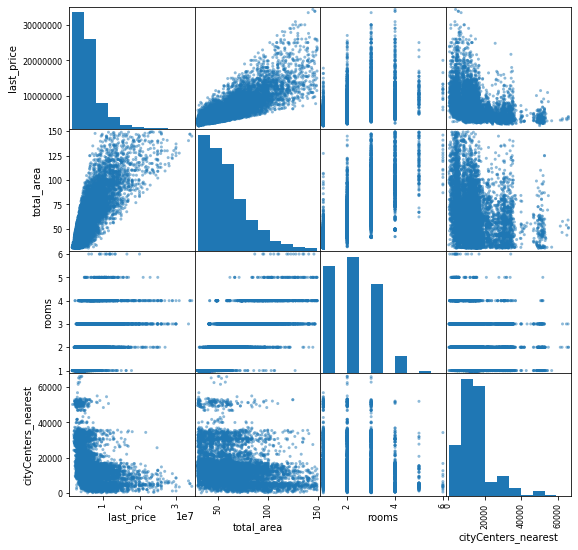

In [241]:
pd.plotting.scatter_matrix(data[['last_price','total_area', 'rooms', 'cityCenters_nearest']], figsize=(9, 9))
print(data[['last_price','total_area', 'rooms', 'cityCenters_nearest']].corr())

### Вывод

По полученным данным видно, что цена больше всего зависит от общей площади квартиры (коэффициент корреляции = 0.8), в меньшей степени- от числа комнат (0.5), и в незначительной степени - от удаленности от центра(-0.3 (обратная зависимость - чем дальше от центра, тем дешевле)

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

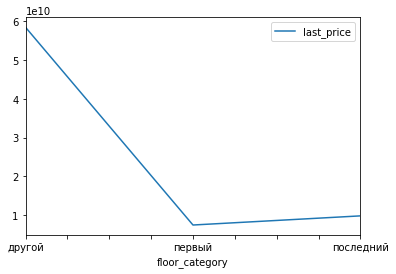

In [242]:
data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'sum').plot()

### Вывод

По полученному графику видно, что квартиры на первом этаже стоят дешевле остальных, на последнем-немного больше, а на "других" этажах - намного больше, чем на первом или последнем.

Теперь изучим зависимость цены ('last_price') от даты размещения: дня недели ('weekday'), месяца('month') и года('year'). Последовательно сделаем из data сводные таблицы со значениями цены, и индексами день недели/месяц/год, для каждой построим график зависимости

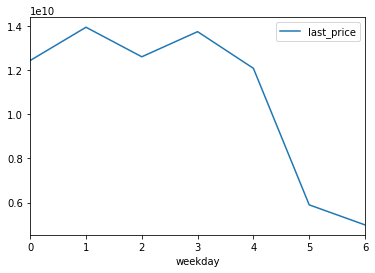

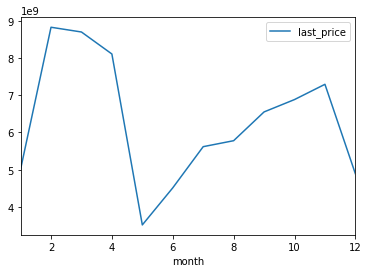

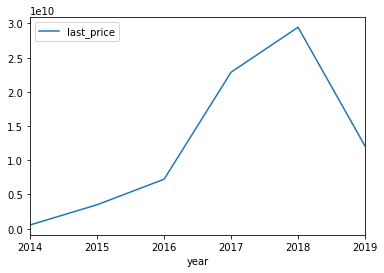

In [243]:
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'sum').plot()
data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'sum').plot()
data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'sum').plot()

### Вывод

Прослеживаемые зависимости: а)квартиры, объявления для которых выложены в будние дни, продаются по более высокой цене, в сравнении с выложенными на выходных; б) квартиры, объявления для которых выложены в мае, продаются по самой низкой цене, а февральские, мартовские и апрельские- по высокой (пик в феврале); в) цены на квартиры росли с 2014 по 2018 год, в 2018 достигли пика, а к 2019 снизились

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

Найдем 10 населённых пунктов с наибольшим числом объявлений. Для этого сгруппируем таблицу data по названию населенного пункта, посчитаем для каждого число объявлений, отсортируем полученные данные по убыванию, оставим первые 10 строк и запишем полученные индексы в переменную top_ten.

In [244]:
top_ten = data.groupby('locality_name')['total_images'].count().sort_values(ascending = False).head(10).index
top_ten

Index(['Санкт-Петербург', 'Всеволожск', 'Пушкин', 'посёлок Шушары', 'Колпино',
       'посёлок Мурино', 'Гатчина', 'Петергоф', 'посёлок Парголово',
       'Сестрорецк'],
      dtype='object', name='locality_name')

### Вывод

10 населённых пунктов с наибольшим числом объявлений: Санкт-Петербург, Всеволожск,Пушкин, посёлок Шушары, Колпино, посёлок Мурино, Гатчина, Петергоф, посёлок Парголово, Сестрорецк. 

Теперь в переменной top_ten_data оставим сгруппированные по названию населенного пункта записи из таблицы data, для которых населенный пункт входит в полученный топ 10 (для всех столбцов возьмем среднее по населенному пункту)

In [245]:
top_ten_data = data[data['locality_name'].isin(top_ten)].pivot_table(index = 'locality_name', aggfunc = 'mean')
top_ten_data

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,price_per_meter,rooms,studio,total_area,total_images,weekday,year
locality_name,,,,,,,,,,,,,,,,,,,,,
Всеволожск,nan,0.9,2.7,nan,205.5,2017-12-10 22:17:57.165354240,4.8,8.7,0.9,10.5,...,nan,nan,nan,68151.2,2.0,0.0,57.1,10.7,2.5,2017.4
Гатчина,nan,0.9,2.6,nan,185.5,2017-12-19 20:25:31.914893568,3.4,6.1,0.9,8.3,...,nan,nan,nan,70986.3,2.0,0.0,51.7,9.3,2.7,2017.5
Колпино,26433.1,0.8,2.6,32198.3,142.3,2018-01-19 08:17:19.175257856,5.1,8.9,0.9,8.9,...,458.8,1.0,547.9,75317.9,2.2,0.0,54.6,9.7,2.5,2017.6
Петергоф,40332.6,0.5,2.6,35688.1,206.0,2017-10-15 14:00:52.554744576,3.5,5.9,0.9,8.0,...,408.6,1.4,510.6,84770.0,1.9,0.0,50.2,10.8,2.6,2017.3
Пушкин,16347.6,0.6,2.7,28739.0,231.4,2017-10-25 09:21:28.073394432,2.9,5.0,0.8,10.4,...,399.6,0.9,475.0,101914.0,2.0,0.0,58.5,9.5,2.4,2017.3
Санкт-Петербург,28242.6,0.7,2.7,11748.9,183.8,2018-01-05 08:54:38.606211584,6.0,11.1,0.9,10.6,...,489.0,0.7,532.2,110097.2,2.1,0.0,60.6,10.6,2.5,2017.5
Сестрорецк,56722.9,0.9,2.7,34571.8,203.3,2017-11-10 10:05:42.857142784,4.3,7.6,0.9,11.4,...,386.0,1.2,412.2,102037.1,2.1,0.0,63.1,10.1,2.5,2017.4
посёлок Мурино,nan,1.1,2.7,nan,177.8,2018-01-11 02:12:19.459459584,10.5,19.2,0.8,11.2,...,nan,nan,nan,86782.4,1.6,0.0,48.9,9.4,2.4,2017.5
посёлок Парголово,53913.1,0.9,2.6,20168.2,148.6,2017-11-24 17:04:00.000000000,11.4,21.2,0.8,11.6,...,304.8,0.3,489.6,91197.1,1.6,0.0,51.3,9.4,2.4,2017.4


Выведем среднюю цену квадратного метра по каждому пункту:

In [246]:
top_ten_data['price_per_meter'].sort_values()

locality_name
Всеволожск           68151.2
Гатчина              70986.3
Колпино              75317.9
посёлок Шушары       78497.3
Петергоф             84770.0
посёлок Мурино       86782.4
посёлок Парголово    91197.1
Пушкин              101914.0
Сестрорецк          102037.1
Санкт-Петербург     110097.2
Name: price_per_meter, dtype: float64

### Вывод

Самая высокая стоимость жилья - в Санкт-Петербурге (в среднем 110097р за кв м) и Сестрорецке(102037), а самая низкая - во Всеволжске(68151) и Гатчине (70986)

#### Выяснить, какая область входит в центр в Санкт-Петербурга.

Сохраним в переменной sp_data информацию о квартирах в Петербурге на базе таблицы data: в столбце 'to_center_km' - расстояние до центра в километрах, округленное до целых значений, в столбце 'price_per_meter'- цену за квадратный метр

In [247]:
sp_data = pd.DataFrame()
sp_data['to_center_km'] = round(data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest']/1000,0)
sp_data['price_per_meter'] = data[data['locality_name'] == 'Санкт-Петербург']['price_per_meter']
sp_data

,to_center_km,price_per_meter
0,16.0,120370.4
4,8.0,100000.0
9,15.0,88524.6
10,14.0,127525.3
16,11.0,81707.3
...,...,...
23602,14.0,91089.1
23603,16.0,100566.6
23605,4.0,129904.0
23608,4.0,72490.8


Теперь посчитаем среднюю цену для каждого километра: построим сводную таблицу из sp_data, в качестве индексов возьмем расстояние до центра в км, а значения - средняя цена за кв м из столбца 'price_per_meter' для этого километра удаленности от центра. Построим график, который показывает, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

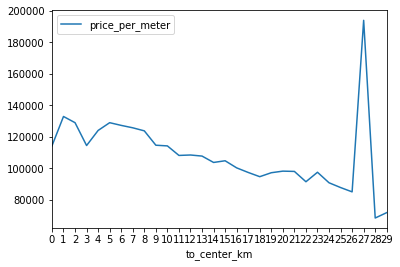

In [248]:
sp_data.pivot_table(index = 'to_center_km', aggfunc = 'mean').plot(xticks = (range(30)))

### Вывод

Итак, центральная зона - примерно до 9 км. Дальше цены убывают, за исключением необычного пика на 27 км)

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

Сохраним в переменной sp_center данные о квартирах в центре Петербурга (до 9 км) из таблицы data

In [249]:
sp_center = data[(data['locality_name'] == 'Санкт-Петербург')\
 & (round(data['cityCenters_nearest']/1000,0) <= 9.0)]
sp_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_category,living_to_total,kitchen_to_total
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,True,...,1,48.0,121.0,100000.0,1,6,2018,другой,0.3,0.4
52,20,11795000.0,136.0,2017-09-22,6,3.0,2,94.0,2,True,...,0,nan,nan,86727.9,4,9,2017,последний,0.7,0.1
63,2,20000000.0,118.0,2018-09-11,3,3.0,9,68.0,7,True,...,1,779.0,37.0,169491.5,1,9,2018,другой,0.6,0.1
85,13,5200000.0,46.3,2018-11-26,2,3.0,5,27.8,5,True,...,1,682.0,65.0,112311.0,0,11,2018,последний,0.6,0.2
106,9,10500000.0,124.1,2017-05-25,5,3.2,4,79.4,3,True,...,0,nan,6.0,84609.2,3,5,2017,другой,0.6,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23578,5,9000000.0,110.0,2015-12-10,4,3.4,7,64.6,5,True,...,1,118.0,816.0,81818.2,3,12,2015,другой,0.6,0.1
23582,13,6000000.0,47.0,2018-03-16,2,3.0,5,27.0,4,True,...,0,nan,157.0,127659.6,4,3,2018,другой,0.6,0.2
23595,13,5250000.0,43.0,2018-05-11,2,2.5,5,29.0,2,True,...,2,660.0,80.0,122093.0,4,5,2018,другой,0.7,0.1
23605,11,9470000.0,72.9,2016-10-13,2,2.8,25,40.3,7,True,...,1,806.0,519.0,129904.0,3,10,2016,другой,0.6,0.1


В этом районе продавалось около 2559 квартир. Изучим площадь, цену за кв м, число комнат, высоту потолков.

In [250]:
sp_center.describe()[['total_area', 'price_per_meter', 'rooms', 'ceiling_height']]

,total_area,price_per_meter,rooms,ceiling_height
count,2559.0,2559.0,2559.0,2559.0
mean,73.8,123948.1,2.5,3.0
std,28.1,34869.1,1.0,0.3
min,30.3,59523.8,1.0,2.4
25%,50.9,97841.3,2.0,2.7
50%,70.0,117079.6,2.0,3.0
75%,92.0,142133.8,3.0,3.2
max,149.3,248333.3,6.0,4.0


### Вывод

Квартиры в этом районе представлены самые разрные: площадью от 30.3 до 149.3 кв м (в среднем - 73.8), с числом комнат от 1 до 6 (чаще - 2), высотой потолков от 2.4 до 4 м (в среднем - 3), и ценой за кв м от ~60 000 и до ~250 000 р. (в срднем - ~124 000р за кв м)

**Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

Сравним коэффициенты корреляции между ценой и числом комнат, этажом, удалённостью от центра, днем недели и месяцем размещения объявления по всему Санкт-Петербургу и по его центру

In [251]:
print('По всему городу:')
print(data[data['locality_name'] == 'Санкт-Петербург'][['last_price', 'rooms', 'floor_category', 'cityCenters_nearest', 'weekday', 'month']].corr())
print('\nПо центру:')
print(sp_center[['last_price', 'rooms', 'floor_category', 'cityCenters_nearest', 'weekday', 'month']].corr())

По всему городу:
                     last_price  rooms  cityCenters_nearest  weekday  month
last_price                  1.0    0.5                 -0.4     -0.0   -0.0
rooms                       0.5    1.0                 -0.2     -0.0    0.0
cityCenters_nearest        -0.4   -0.2                  1.0     -0.0    0.0
weekday                    -0.0   -0.0                 -0.0      1.0   -0.0
month                      -0.0    0.0                  0.0     -0.0    1.0

По центру:
                     last_price  rooms  cityCenters_nearest  weekday  month
last_price                  1.0    0.4                 -0.2     -0.0   -0.0
rooms                       0.4    1.0                 -0.3     -0.0    0.0
cityCenters_nearest        -0.2   -0.3                  1.0      0.0   -0.0
weekday                    -0.0   -0.0                  0.0      1.0    0.0
month                      -0.0    0.0                 -0.0      0.0    1.0


### Вывод

На стоимость квартиры как по всему Санкт-Петербургу, так и по его центру не влияют ни день недели, ни месяц публикации объявления. Число комнат коррелирует с ценой по всему городу на 0.1 больше, чем по его центру. А вот от близости к центру цена квартиры в центральном районе Петербурга зависит гораздо меньше (-0.2 - почти не зависит), сравнивая с зависимостью по всему городу. Оно и ясно: квартиры и так находятся в районе центра, поэтому +-1 км практически ничего не решает.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё абсолютно верно, радует,что пишешь такие подробные и всепокрывающие выводы

### Шаг 5. Общий вывод

Таким образом, цены на квартиры больше всего завися от общей площади квартиры (коэффициент корреляции = 0.8), в меньшей степени- от числа комнат (0.5), и в незначительной степени - от удаленности от центра(-0.3 (обратная зависимость - чем дальше от центра, тем дешевле). При этом  квартиры на первом и последнем этажах стоят дешевле квартир на остальных этажах. Прослеживаемые зависимости от даты публикации: а)квартиры, объявления для которых выложены в будние дни, продаются по более высокой цене, в сравнении с выложенными на выходных; б) квартиры, объявления для которых выложены в мае, продаются по самой низкой цене, а февральские, мартовские и апрельские- по высокой (пик в феврале); в) цены на квартиры росли с 2014 по 2018 год, в 2018 достигли пика, а к 2019 снизились.

В районе Санкт-Петербурга и соседних населённых пунктов 10 населённых пунктов с наибольшим числом объявлений - Санкт-Петербург, Всеволожск,Пушкин, посёлок Шушары, Колпино, посёлок Мурино, Гатчина, Петергоф, посёлок Парголово, Сестрорецк. Самая высокая стоимость жилья - в Санкт-Петербурге (в среднем 110097р за кв м), а самая низкая - во Всеволжске(68151). При этом цена квартир в центре Санкт-Петербурга имеет все те же зависимости от параметров, описанных выше, за исключением удаленности от центра: здесь эта зависимость куда более слабая.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Замечательный вывод покрывающий все аспекты проделанной работы! 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)